<a href="https://colab.research.google.com/github/cheesecakephobia/food-sales-prediction/blob/main/Food_sale_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [66]:
filename = '//content/drive/MyDrive/PTDataScience/PandasForDataManipulation/AnyConv.com__Data.txt'
sales_prediction = pd.read_csv(filename)

In [67]:
sales_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
df= sales_prediction.loc[0:8523,:].dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [28]:
df.rename(columns= {'Item_Outlet_Sales': 'Outlet_Total_Item_Sales'},inplace = True)
df['Item_Fat_Content'].replace({'low fat': 'Low Fat','reg': 'Regular','LF':'Low Fat'},inplace= True)

In [29]:
type = df['Item_Type']
total_sales = df['Outlet_Total_Item_Sales']
fat_content = df['Item_Fat_Content']
outlet = df['Outlet_Type']
outlet_size = df['Outlet_Size']


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Outlet_Total_Item_Sales    4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


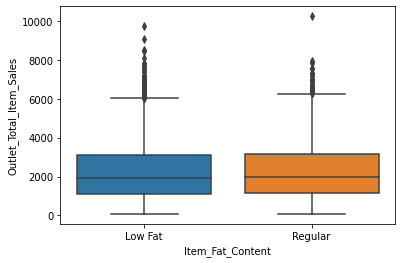

In [35]:
sns.boxplot(x= 'Item_Fat_Content', y= 'Outlet_Total_Item_Sales',data= df)

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Total_Item_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [37]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [38]:
df['Item_Fat_Content'].replace({'Low Fat': 1,'Regular':0}, inplace = True)
df['Outlet_Size'].replace({'Medium': 1,'High':0, 'Small':0}, inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Total_Item_Sales
0,FDA15,9.300,1,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,0,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,1,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,1,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,0,0.000000,Baking Goods,51.4008,OUT018,2009,1,Tier 3,Supermarket Type2,556.6088


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   int64  
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   int64  
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Outlet_Total_Item_Sales    4650 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 632.3+ KB


In [ ]:
cm = df.corr()
cm

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Total_Item_Sales
Item_Weight,1.000000,0.033026,-0.010229,0.033330,-0.010596,-0.000569,0.010972
Item_Fat_Content,0.033026,1.000000,-0.059357,-0.006966,-0.001849,-0.005792,-0.008847
Item_Visibility,-0.010229,-0.059357,1.000000,-0.007292,0.009324,0.003831,-0.009644
Item_MRP,0.033330,-0.006966,-0.007292,1.000000,0.004105,-0.009527,0.679594
Outlet_Establishment_Year,-0.010596,-0.001849,0.009324,0.004105,1.000000,0.530455,-0.040869
Outlet_Size,-0.000569,-0.005792,0.003831,-0.009527,0.530455,1.000000,-0.054421
Outlet_Total_Item_Sales,0.010972,-0.008847,-0.009644,0.679594,-0.040869,-0.054421,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   int64  
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   int64  
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Outlet_Total_Item_Sales    4650 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 632.3+ KB


In [69]:
df['Item_Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [68]:
df['Item_Type'].replace({'Dairy': 0,'Soft Drinks': 1, 'Meat': 2, 'Household':3, 'Baking Goods':4,
       'Snack Foods':5, 'Fruits and Vegetables': 6, 'Breakfast':7,
       'Health and Hygiene':8, 'Frozen Foods':9, 'Hard Drinks':10, 'Canned':11,
       'Starchy Foods':12, 'Breads':13, 'Others':14, 'Seafood':15}, inplace = True)

TypeError: ignored

In [70]:
df['Outlet_Location_Type'].unique()

array([0, 1, 2])

In [63]:
df['Outlet_Location_Type'].replace({'Tier 1': 0, 'Tier 3': 1, 'Tier 2':2}, inplace = True)

TypeError: ignored

In [71]:
df['Outlet_Type'].unique()

array([0, 1])

In [61]:
df['Outlet_Type'].replace({'Supermarket Type1':0, 'Supermarket Type2':1}, inplace = True)

In [72]:
X = df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
X.shape

(4650, 9)

In [73]:
y = df['Outlet_Total_Item_Sales'].values
y.shape

(4650,)

In [74]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X);

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier()
print(knn_class)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [78]:
knn_class.fit(X,y)

ValueError: ignored

In [79]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [80]:
preds_age = knn_reg.predict(X)
knn_reg.score(X,y)

0.5704253215359733

In [81]:
df.corr().sort_values(by = ['Outlet_Total_Item_Sales'])

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Total_Item_Sales
Outlet_Type,-0.002708,-0.001697,0.003516,0.011240,-0.000302,0.662985,0.612098,0.133451,1.000000,-0.092191
Outlet_Size,-0.000569,-0.005792,0.003831,0.005839,-0.009527,0.530455,1.000000,-0.327620,0.612098,-0.054421
Outlet_Establishment_Year,-0.010596,-0.001849,0.009324,0.015862,0.004105,1.000000,0.530455,0.260118,0.662985,-0.040869
Item_Visibility,-0.010229,-0.059357,1.000000,-0.001466,-0.007292,0.009324,0.003831,0.004158,0.003516,-0.009644
Item_Fat_Content,0.033026,1.000000,-0.059357,-0.036386,-0.006966,-0.001849,-0.005792,0.007692,-0.001697,-0.008847
Item_Type,-0.034644,-0.036386,-0.001466,1.000000,-0.018663,0.015862,0.005839,0.003960,0.011240,0.002779
Item_Weight,1.000000,0.033026,-0.010229,-0.034644,0.033330,-0.010596,-0.000569,-0.003217,-0.002708,0.010972
Outlet_Location_Type,-0.003217,0.007692,0.004158,0.003960,0.010636,0.260118,-0.327620,1.000000,0.133451,0.015110
Item_MRP,0.033330,-0.006966,-0.007292,-0.018663,1.000000,0.004105,-0.009527,0.010636,-0.000302,0.679594
Outlet_Total_Item_Sales,0.010972,-0.008847,-0.009644,0.002779,0.679594,-0.040869,-0.054421,0.015110,-0.092191,1.000000


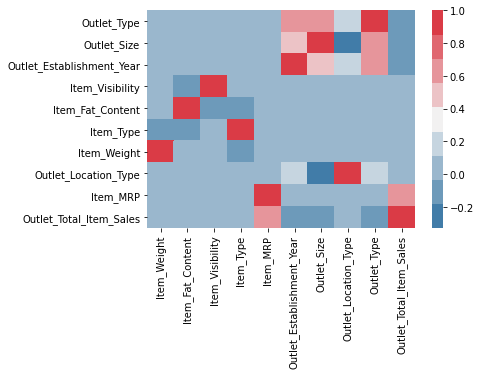

In [86]:
sns.heatmap(df.corr().sort_values(by = ['Outlet_Total_Item_Sales']), cmap = sns.diverging_palette(240, 10, n=9))

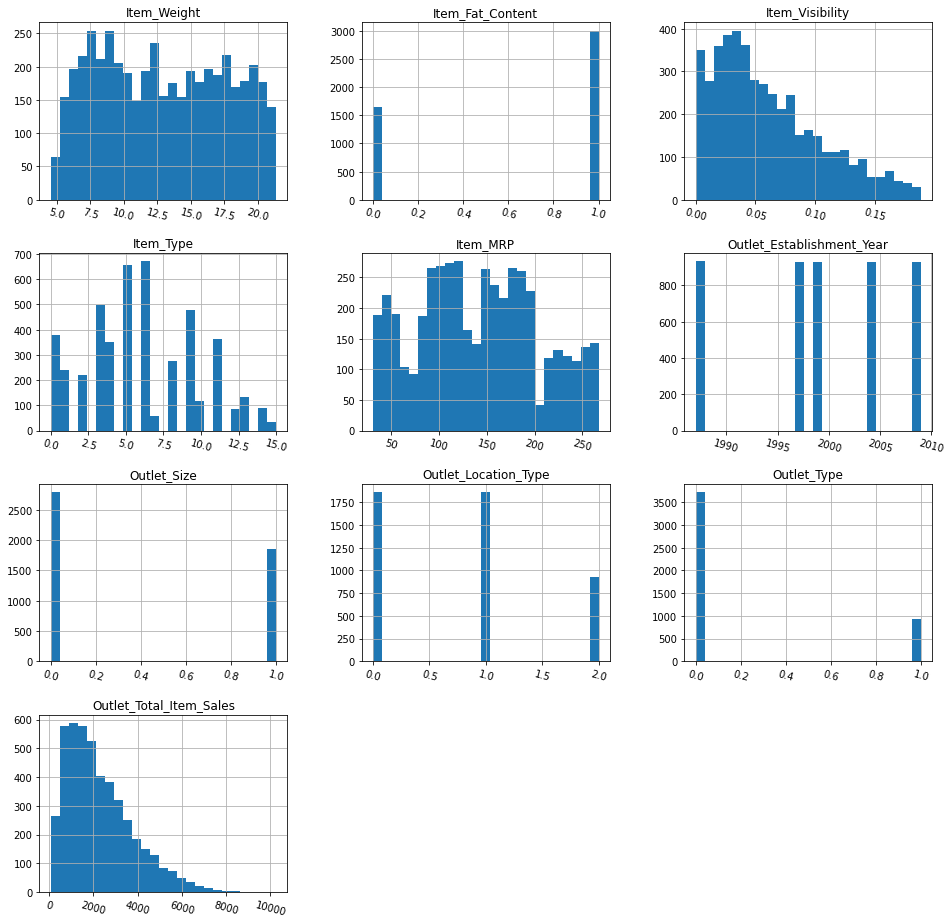

In [88]:
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

The score of the model is 0.5704253215359733 which is not very good.
We can try to tune Hyperparameters to improve model. For examples: changing n_neighbors hyperparameter or tune the weights hyperparameter.
Source: https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6559796-tune-your-hyperparameters

Feature Item_MRP (Maximum Retail Price of the product is the most associated with higher predicted sales. 